<a href="https://colab.research.google.com/github/MinhoJu/SRT/blob/master/WTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Import matplotlib 
from pandas_datareader import data
import pandas_datareader as pdr
import datetime 
from datetime import date, timedelta
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')

df = pd.DataFrame()
wti_dict = dict()

start = datetime.datetime(2020, 3, 1)
end = date.today()

# KODEX WTI
kodex_wti = pdr.get_data_yahoo('261220.KS', start=start, end=end)
df['KODEX WTI'] = (kodex_wti['Close']*47.18) /16500

# Ours
df['SA_JU'] = (kodex_wti['Close']*0) + 25.01

# WTI Fund (KR5105924298)
link = 'http://m.samsungfund.com/retFundPrice_Excel.action?fId=1M2101&officeCoCd=0030200000&currencyCd='
df_excel = pd.read_excel(link,'www.samsungfund.com')
df_excel['일자'] = pd.to_datetime(df_excel['일자']) - datetime.timedelta(days=1)
data = df_excel.to_numpy()
columns = ['Close', 'Diff', 'Close2', 'Diff2']
df_wti_fund = pd.DataFrame(data=data[0:,1:],
                  index=data[0:,0],
                  columns=columns)
df_wti_fund['Close'] = df_wti_fund['Close'].astype(float)
df_wti_fund['Close'] = (df_wti_fund['Close']*47.18) / 287.98
df['Fund WTI'] = df_wti_fund['Close']

# WTI
wti_cl = pdr.get_data_yahoo('CL=F', start=start, end=end)
wti_dict['CL=F'] = wti_cl
df['WTI Current'] = wti_cl['Close']

# WTI Futures
symbols = ['CLM20.NYM', 'CLN20.NYM', 'CLQ20.NYM', 'CLU20.NYM', 'CLV20.NYM', 'CLX20.NYM', 'CLZ20.NYM']

for symbol in symbols:
  wti = pdr.get_data_yahoo(symbol, start=start, end=end)
  wti_dict[symbol] = wti


for index in range(3):
  month = index + 6
  df['2020-%d'%month] = wti_dict[symbols[index]]['Close']

df.fillna(method='ffill', inplace=True)

<Figure size 1600x1280 with 0 Axes>

In [25]:
df_excel['일자'] = pd.to_datetime(df_excel['일자']) + datetime.timedelta(days=1)
df_excel.head(10)

,일자,기준가격(원),전일대비,과표기준가격(원),전일대비.1
0,2020-05-09,112.04,-3.19,113.47,-3.34
1,2020-05-08,115.23,-3.67,116.81,-3.24
2,2020-05-07,118.90,17.72,120.05,17.70
3,2020-05-06,101.18,0.00,102.35,0.00
4,2020-05-05,101.18,18.83,102.35,18.57
5,2020-05-04,82.35,0.00,83.78,0.00
6,2020-05-03,82.35,0.00,83.78,0.00
7,2020-05-02,82.35,-0.01,83.78,0.00
8,2020-05-01,82.36,0.00,83.78,-0.01
9,2020-04-30,82.36,-1.67,83.79,-2.17


In [17]:
df.iloc[::-1].head(10)

,KODEX WTI,SA_JU,Fund WTI,WTI Current,2020-6,2020-7,2020-8
Date,,,,,,,
2020-05-08,12.924461,25.01,18.355605,24.629999,24.629999,26.040001,27.900000
2020-05-07,12.567036,25.01,18.878226,23.590000,23.590000,24.920000,26.510000
2020-05-06,12.967352,25.01,19.479485,23.780001,23.780001,25.280001,26.820000
2020-05-04,10.779915,25.01,16.576403,19.780001,19.780001,22.290001,24.200001
2020-04-29,9.679048,25.01,13.493106,12.340000,12.340000,17.600000,21.170000
2020-04-28,8.949903,25.01,13.766704,13.400000,13.400000,17.900000,21.290001
2020-04-27,10.522570,25.01,15.848994,12.340000,12.340000,18.570000,21.780001
2020-04-24,11.866485,25.01,16.091463,17.180000,17.180000,21.250000,24.170000
2020-04-23,11.809297,25.01,15.617992,17.170000,17.170000,22.469999,25.180000


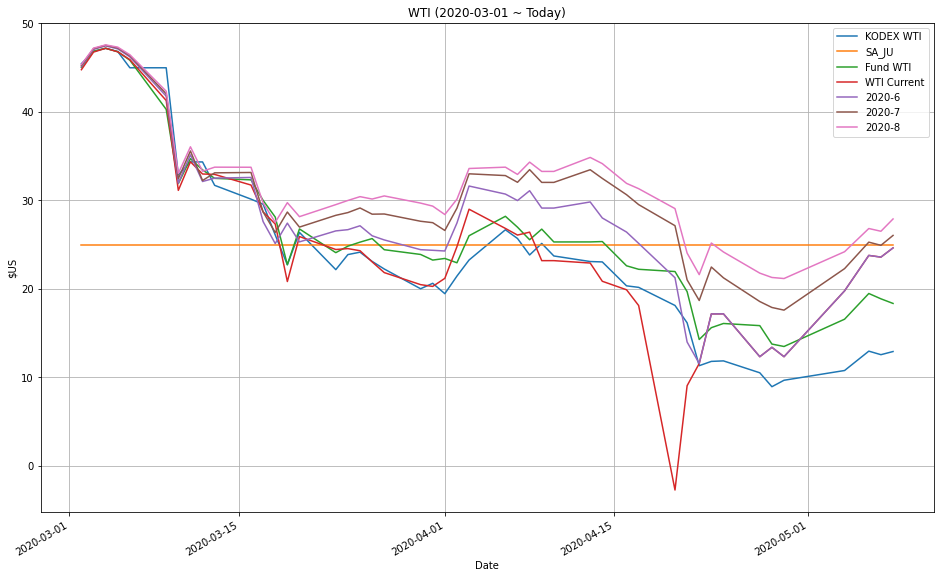

In [18]:
# Show plot
df.plot(grid=True, figsize=(16, 10))
plt.title('WTI (2020-03-01 ~ Today)')
plt.ylabel('$US')
plt.show()

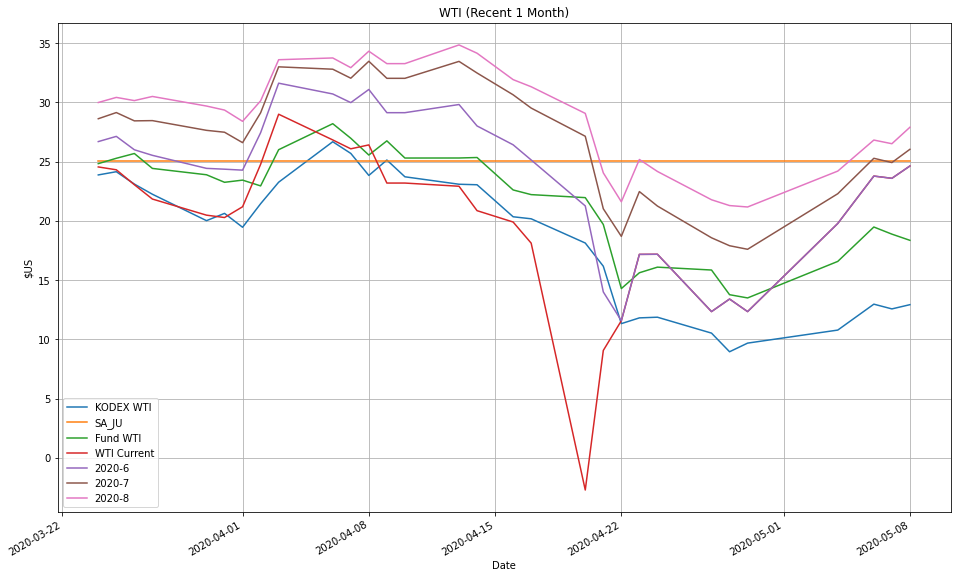

In [19]:
# Plot
df_month = df.tail(30)

# Show plot
df_month.plot(grid=True, figsize=(16, 10))
plt.title('WTI (Recent 1 Month)')
plt.ylabel('$US')
plt.show()

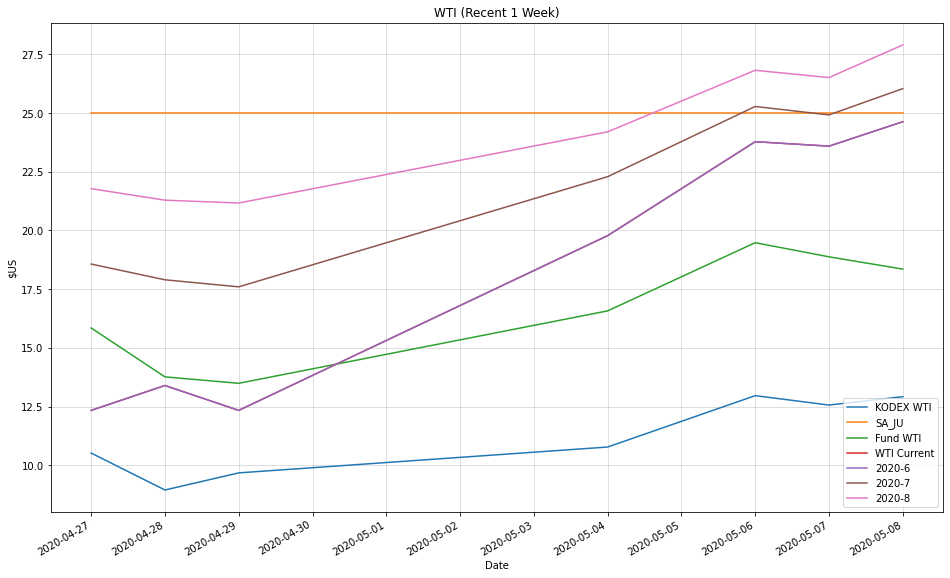

In [20]:
# Plot
df_month = df.tail(7)

# Show plot
ax = df_month.plot(grid=True, figsize=(16, 10))

plt.title('WTI (Recent 1 Week)')
plt.ylabel('$US')
major_ticks = np.arange(0, 30, 1)
ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.set_yticks(major_ticks)


plt.grid(which='both')
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)

plt.show()

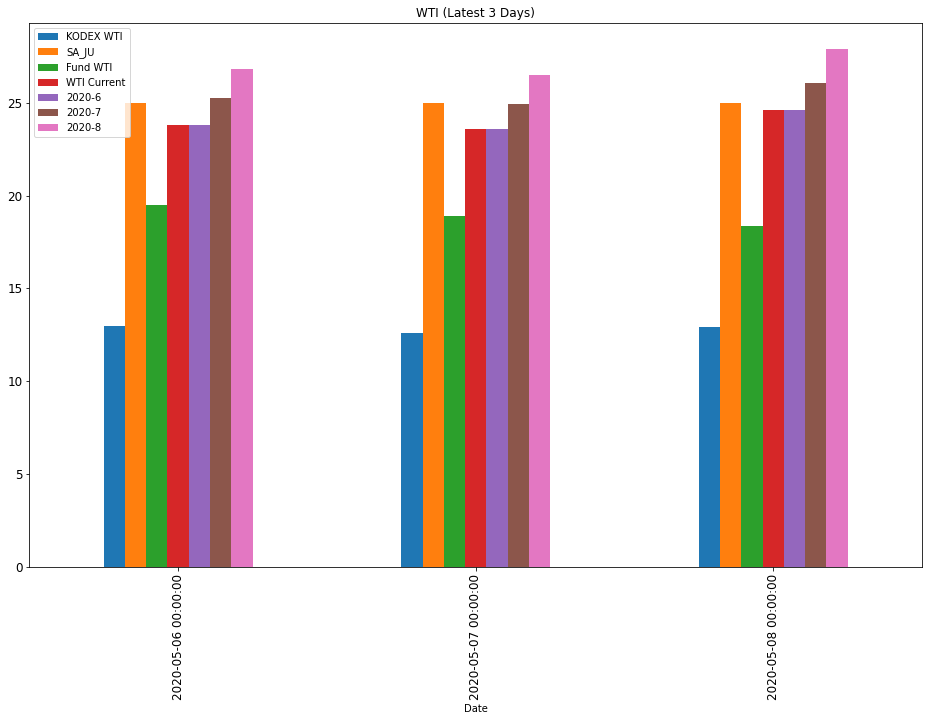

In [21]:
# Plot
df_day = df.tail(3)

# Show plot
ax = df_day.plot(kind='bar', title ="WTI (Latest 3 Days)", figsize=(16, 10), legend=True, fontsize=12)

plt.show()

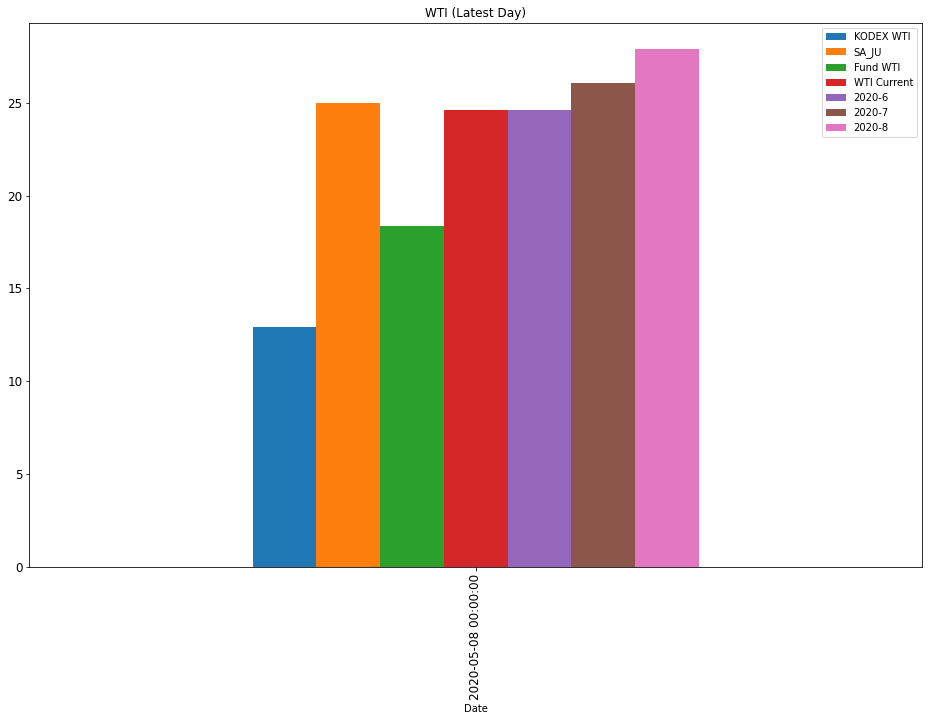

In [22]:
# Plot
df_day = df.tail(1)

# Show plot
ax = df_day.plot(kind='bar', title ="WTI (Latest Day)", figsize=(16, 10), legend=True, fontsize=12)

plt.show()

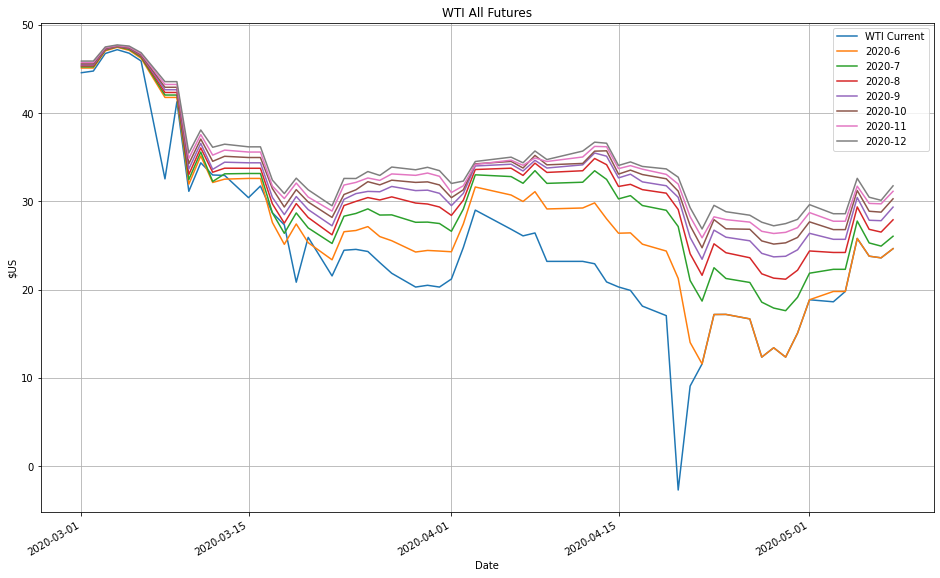

In [23]:
# Plot for all wti futures
df_futures = pd.DataFrame()
df_futures['WTI Current'] = wti_dict['CL=F']['Close']

for index in range(7):
  month = index + 6
  df_futures['2020-%d'%month] = wti_dict[symbols[index]]['Close']

df_futures.fillna(method='ffill', inplace=True)

# Show plot
ax = df_futures.plot(grid=True, figsize=(16, 10))
# ax.xaxis.set_major_locator(mdates.WeeksLocator())

plt.title('WTI All Futures')
plt.ylabel('$US')
plt.show()

In [24]:
%%html
<a href="http://m.samsungfund.com/retFundView.action?fundCd=KR5105924298">link</a>